#Setup

In [1]:
!git init
!git remote add origin https://github.com/sgerloff/sustainable_deepfashion.git
!git pull origin main
!pip install -r requirements.txt

!make setup-preprocessed-gc CATEGORY_ID=1 MIN_PAIR_COUNT=10

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 966 (delta 235), reused 240 (delta 123), pack-reused 604
Receiving objects: 100% (966/966), 8.99 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (583/583), done.
From https://github.com/sgerloff/sustainable_deepfashion
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
     |████████████████████████████████| 706kB 12.8MB/s 
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22765 sha256=498a0b525e0c017fe293ee79c9bdff350340af8985455dc46b4d15d1179917f1
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0891e979345d4
Successfully built zipfile38


Streaming output truncated to the last 5000 lines.
  inflating: data/processed/category_1_min_count_10/train/154327_11663.jpg  
  inflating: data/processed/category_1_min_count_10/train/012592_989.jpg  
  inflating: data/processed/category_1_min_count_10/train/182869_13838.jpg  
  inflating: data/processed/category_1_min_count_10/train/154386_11667.jpg  
  inflating: data/processed/category_1_min_count_10/train/080329_6097.jpg  
  inflating: data/processed/category_1_min_count_10/train/023473_1800.jpg  
  inflating: data/processed/category_1_min_count_10/train/000214_18.jpg  
  inflating: data/processed/category_1_min_count_10/train/047468_3615.jpg  
  inflating: data/processed/category_1_min_count_10/train/159943_12073.jpg  
  inflating: data/processed/category_1_min_count_10/train/052334_3992.jpg  
  inflating: data/processed/category_1_min_count_10/train/182827_13834.jpg  
  inflating: data/processed/category_1_min_count_10/train/086201_6551.jpg  
  inflating: data/processed/categor

#Learning Rate Estimation

In [2]:
!wget http://d2fcl18pl6lkip.cloudfront.net/VAE_conv2d.zip
!unzip VAE_conv2d.zip 

--2021-03-26 09:23:40--  http://d2fcl18pl6lkip.cloudfront.net/VAE_conv2d.zip
Resolving d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)... 99.86.34.205, 99.86.34.59, 99.86.34.202, ...
Connecting to d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)|99.86.34.205|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://d2fcl18pl6lkip.cloudfront.net/VAE_conv2d.zip [following]
--2021-03-26 09:23:40--  https://d2fcl18pl6lkip.cloudfront.net/VAE_conv2d.zip
Connecting to d2fcl18pl6lkip.cloudfront.net (d2fcl18pl6lkip.cloudfront.net)|99.86.34.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723134022 (690M) [application/zip]
Saving to: ‘VAE_conv2d.zip’

VAE_conv2d.zip      100%[===================>] 689.63M  18.0MB/s    in 39s     

2021-03-26 09:24:19 (17.7 MB/s) - ‘VAE_conv2d.zip’ saved [723134022/723134022]



# VAE

In [6]:
from src.instruction_utility import *

instruction_parser = InstructionParser("VAE_conv2d.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

Epoch 1/11
188/188 [==============================] - 295s 2s/step - loss: 1704.4697 - reconstruction_loss: 1590.5212 - kl_loss: 105.3545
Epoch 2/11
188/188 [==============================] - 289s 2s/step - loss: 1704.6070 - reconstruction_loss: 1590.2072 - kl_loss: 105.3777
Epoch 3/11
188/188 [==============================] - 289s 2s/step - loss: 1703.8563 - reconstruction_loss: 1588.8413 - kl_loss: 105.3531
Epoch 4/11
188/188 [==============================] - 289s 2s/step - loss: 1699.8156 - reconstruction_loss: 1586.2968 - kl_loss: 104.6248
Epoch 5/11
188/188 [==============================] - 289s 2s/step - loss: 1688.8752 - reconstruction_loss: 1573.3317 - kl_loss: 102.2015
Epoch 6/11
188/188 [==============================] - 289s 2s/step - loss: 1652.8831 - reconstruction_loss: 1536.5198 - kl_loss: 98.2229
Epoch 7/11
188/188 [==============================] - 289s 2s/step - loss: 1579.3658 - reconstruction_loss: 1459.4990 - kl_loss: 92.7599
Epoch 8/11
188/188 [================

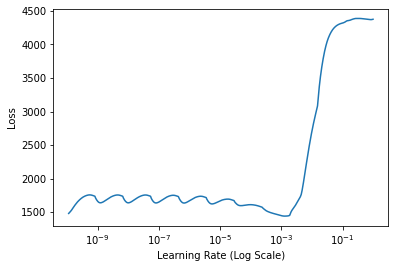

In [13]:
from src.models.learning_rate_estimator import LearningRateEstimator

model = instruction_parser.model_factory.get_model()
model.compile(optimizer=instruction_parser.get_optimizer())
model.built = True
model.load_weights("models/VAE_conv2d.h5")

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = 188

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-10, 1e0, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

# Triplet loss

In [ ]:
from src.instruction_utility import *

instruction_parser = InstructionParser("mobilenet_v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

9412608/9406464 [==============================] - 0s 0us/step


2592/2592 [==============================] - 477s 171ms/step - loss: 0.9955


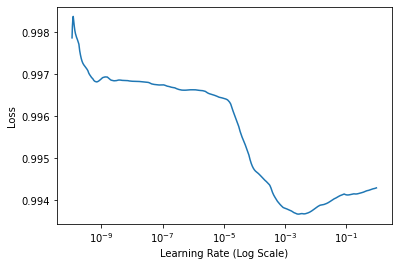

In [ ]:
from src.models.learning_rate_estimator import LearningRateEstimator

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-10, 1e0, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 443s 170ms/step - loss: 0.9926


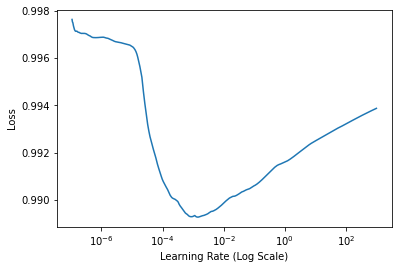

In [ ]:
instruction_parser = InstructionParser("mobilenet_v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 591s 226ms/step - loss: 0.9825


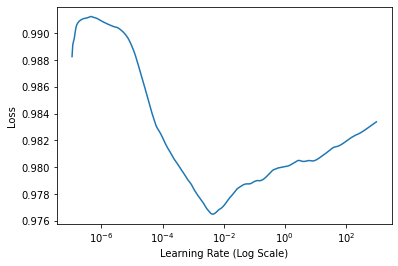

In [ ]:
instruction_parser = InstructionParser("efficientnetb0_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()

2592/2592 [==============================] - 940s 361ms/step - loss: 0.9862


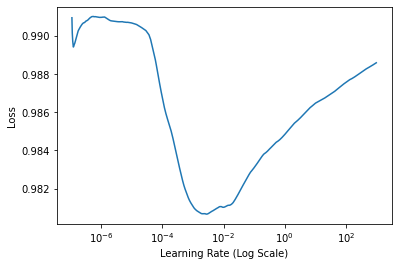

In [ ]:
instruction_parser = InstructionParser("resnet50v2_frozen.json")
train_df = load_dataframe(instruction_parser.instruction["train_data"]["dataframe"])

model = instruction_parser.get_model()
model.compile(
    loss=instruction_parser.get_loss(),
    optimizer=instruction_parser.get_optimizer()
)

dataset = instruction_parser.get_train_dataset().repeat()

steps_per_epoch = train_df["pair_id"].nunique()

lrf = LearningRateEstimator()
lrf.find(model, dataset, 1e-7, 1e3, steps_per_epoch=steps_per_epoch)
lrf.plot_loss()